In [15]:
import sys 
import numpy as np

source = []
target = []
weight = []
class Graph():#1

    def __init__(self, vertices):
        print(self)
        self.V = vertices
        #self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
        self.graph=np.zeros([self.V,self.V])
        #print(self.graph)

    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):#4
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][ parent[i] ])
            source.append(parent[i])
            target.append(i)
            weight.append(self.graph[i][ parent[i] ])

    # A utility function to find the vertex with minimum distance value, from the set of vertices not yet included in shortest path tree
    def minKey(self, key, mstSet):#3

        # Initialize min value
        min = sys.maxsize

        for v in range(self.V):
            #print(key[v])
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v

        return min_index

    # Function to construct and print MST for a graph represented using adjacency matrix representation
    def primMST(self):#2
        #print(self.V)
        #print(sys.maxsize)
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        #print(key)
        parent = [None] * self.V # Array to store constructed MST
        #print(parent)
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
        #print(mstSet)

        parent[0] = -1 # First node is always the root of

        for cout in range(self.V):
            #print(cout)
            #print(key)
            #print(mstSet)
            # Pick the minimum distance vertex from the set of vertices not yet processed. u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
            #print(u)

            # Put the minimum distance vertex in the shortest path tree
            mstSet[u] = True
            #print(mstSet)

            # Update dist value of the adjacent vertices of the picked vertex only if the current distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                #print(v)
                #print(self.graph[u][v])
                #print(mstSet[v])
                #print(key[v])
                # graph[u][v] is non zero only for adjacent vertices of m mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        #print(key)
                        parent[v] = u
                        #print(parent)

        self.printMST(parent)



In [16]:
import pandas as pd
import networkx as nx
import sys 
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
data = pd.read_csv("asoiaf-all-edges.csv")
data
edges = data.groupby(['Source','Target']).agg({'weight':'sum'}).reset_index()
edges

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


<class 'networkx.classes.graph.Graph'>
Graph with 796 nodes and 2823 edges
[[0 3 3 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


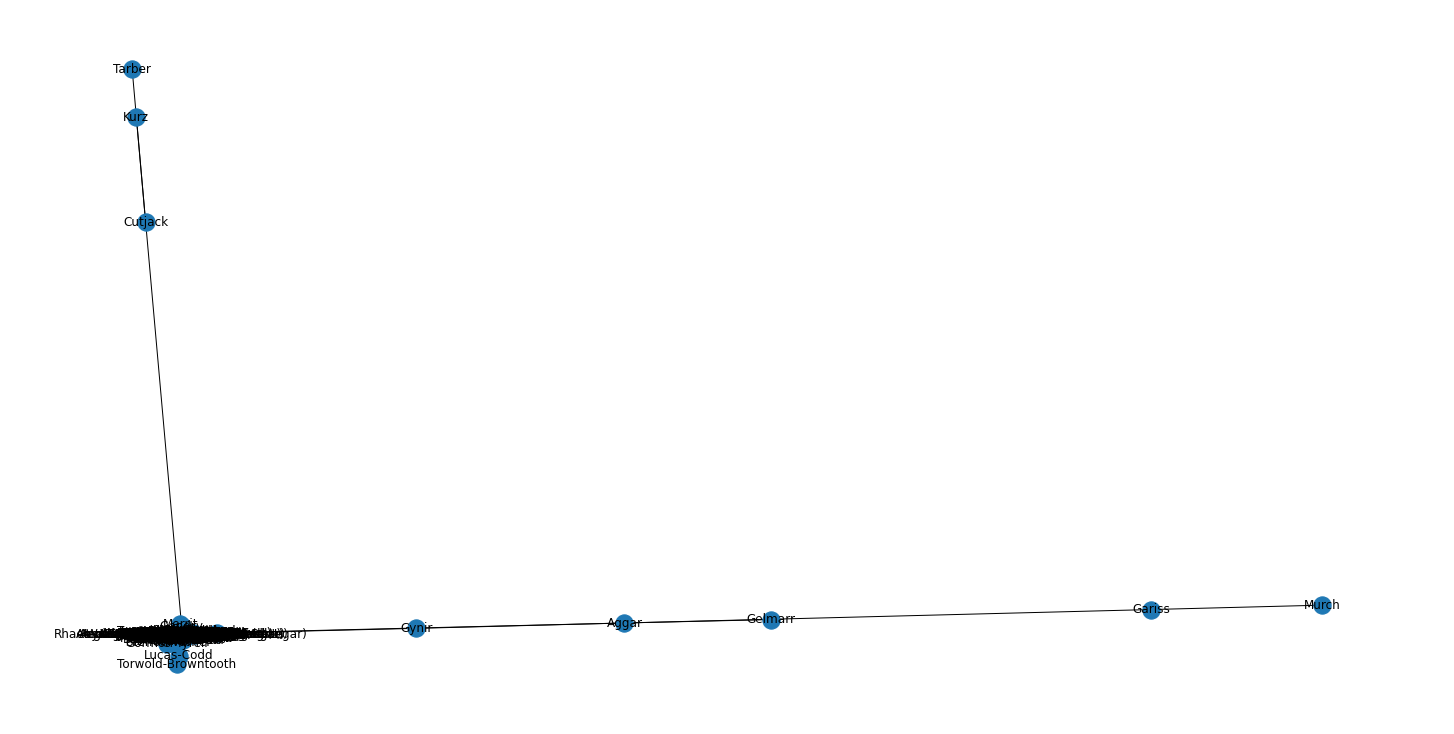

In [17]:


g = nx.from_pandas_edgelist(edges, 
                            source='Source',
                            target='Target',
                            edge_attr='weight'
                            )
print(type(g))
print(nx.info(g))
nodes=list(g.nodes())
nx.draw_spectral(g,with_labels=True)
mat=nx.adjacency_matrix(g,nodelist=None)
print((mat.todense()))

In [18]:
print(len(mat.todense()))
print(type(mat.todense()))

796
<class 'numpy.matrix'>


In [19]:
g = Graph(796)
g.graph=mat.todense().tolist()
#print(g.graph)
g.primMST()

[[0, 3, 3, 3, 14, 3, 3, 3, 4, 3, 7, 6, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

192 - 271 	 3
92 - 272 	 3
68 - 273 	 6
64 - 274 	 3
255 - 275 	 13
169 - 276 	 4
166 - 277 	 3
167 - 278 	 3
68 - 279 	 6
73 - 280 	 4
4 - 281 	 3
59 - 282 	 3
73 - 283 	 3
73 - 284 	 3
284 - 285 	 3
73 - 286 	 3
86 - 287 	 3
73 - 288 	 3
73 - 289 	 3
73 - 290 	 3
284 - 291 	 3
73 - 292 	 3
73 - 293 	 3
28 - 294 	 3
3 - 295 	 3
4 - 296 	 3
170 - 297 	 3
24 - 298 	 3
295 - 299 	 3
131 - 300 	 3
128 - 301 	 3
6 - 302 	 3
24 - 303 	 6
305 - 304 	 5
156 - 305 	 3
10 - 306 	 3
309 - 307 	 3
307 - 308 	 4
11 - 309 	 4
2 - 310 	 7
114 - 311 	 3
90 - 312 	 3
12 - 313 	 3
328 - 314 	 3
316 - 315 	 5
336 - 316 	 3
24 - 317 	 3
70 - 318 	 4
324 - 319 	 3
19 - 320 	 3
322 - 321 	 4
90 - 322 	 3
330 - 323 	 3
237 - 324 	 3
331 - 325 	 3
90 - 326 	 3
110 - 327 	 3
57 - 328 	 3
330 - 329 	 5
105 - 330 	 3
90 - 331 	 3
90 - 332 	 3
90 - 333 	 3
19 - 334 	 4
130 - 335 	 4
65 - 336 	 3
55 - 337 	 3
324 - 338 	 3
325 - 339 	 4
236 - 340 	 3
19 - 341 	 3
19 - 342 	 4
70 - 343 	 4
10 - 344 	 3
319 - 345 	

In [20]:
print(len(weight))

795


In [21]:
print(source[0:5])
print(target[0:5])
source_updated=[]
target_updated=[]
for i in source:
    for j in range(len(nodes)):
        if(i==j):
            source_updated.append(nodes[j])
        
for i in target:
    for j in range(len(nodes)):
        if(i==j):
            target_updated.append(nodes[j])            
                            
source_updated          

[0, 0, 0, 9, 0]
[1, 2, 3, 4, 5]


['Addam-Marbrand',
 'Addam-Marbrand',
 'Addam-Marbrand',
 'Oberyn-Martell',
 'Addam-Marbrand',
 'Addam-Marbrand',
 'Addam-Marbrand',
 'Addam-Marbrand',
 'Addam-Marbrand',
 'Gyles-Rosby',
 'Theon-Greyjoy',
 'Margaery-Tyrell',
 'Stevron-Frey',
 'Beric-Dondarrion',
 'Varys',
 'Walder-Frey',
 'Roose-Bolton',
 'Tyrion-Lannister',
 'Cersei-Lannister',
 'Torrhen-Stark',
 'Aegon-I-Targaryen',
 'Aegon-I-Targaryen',
 'Visenya-Targaryen',
 'Kevan-Lannister',
 'Aegon-I-Targaryen',
 'Aegon-I-Targaryen',
 'Tywin-Lannister',
 'Tywin-Lannister',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Illyrio-Mopatis',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Tywin-Lannister',
 'Haldon',
 'Barristan-Selmy',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Lemore',
 'Aegon-Targaryen-(son-of-Rhaegar)',
 'Haldon',
 'Lemore',
 'Aemon-Targaryen-(Maester-Aemon)',
 'Cotter-Pyke',
 'Jaime-Lannister',
 'Marwyn',
 'Stannis-Baratheon',
 'Stannis-Baratheon',
 'Qhorin-Halfhand',
 'Stannis-Baratheon',
 'Bowen-Marsh',
 'Daenerys-Targaryen',
 'Ae

In [22]:
data = {
    'Source' : source_updated,
    'Target' : target_updated,
    'Weight' : weight
}
dataframe=pd.DataFrame(data)

In [23]:
dataframe

,Source,Target,Weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Oberyn-Martell,Jaime-Lannister,3
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
790,Victarion-Greyjoy,Talbert-Serry,10
791,Theon-Greyjoy,Willow-Witch-eye,4
792,Varamyr,Thistle,7
793,Willem-Lannister,Tion-Frey,6


MST


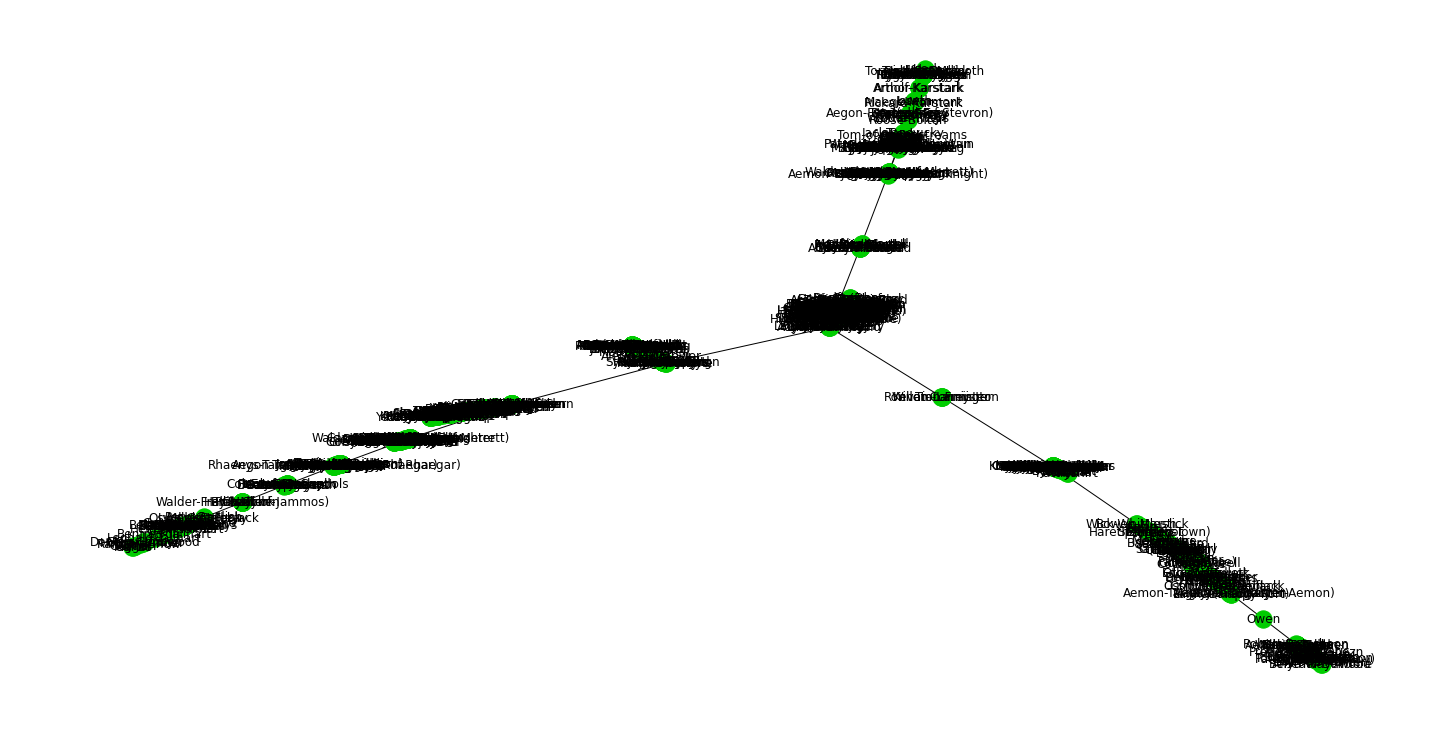

In [24]:
G = nx.from_pandas_edgelist(dataframe, 
                            source='Source',
                            target='Target',
                            edge_attr='Weight')
print('MST')
nx.draw_spectral(G,with_labels=True,node_color='#00CC00')
#weighted_degrees = dict(nx.degree(g,weight='weight'))

In [25]:
meanWeight = (dataframe['Weight'].sum())/len(dataframe.Weight)
meanWeight
maxWeight = dataframe['Weight'].max()
print(meanWeight.round(),maxWeight)

4.0 20


In [26]:
meanWeightedDataFrame =  dataframe[(dataframe['Weight'] < meanWeight.round())]
meanWeightedDataFrame = meanWeightedDataFrame.reset_index()
meanWeightedDataFrame=meanWeightedDataFrame.drop('index',1)
meanWeightedDataFrame

/var/folders/xn/pbsbpr8j45v5t791b8y9t9ww0000gn/T/ipykernel_899/2702974197.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  meanWeightedDataFrame=meanWeightedDataFrame.drop('index',1)


,Source,Target,Weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Oberyn-Martell,Jaime-Lannister,3
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
581,Smiling-Knight,Simon-Toyne,3
582,Stannis-Baratheon,Theomore,3
583,Stannis-Baratheon,William-Foxglove,3
584,Theon-Greyjoy,Werlag,3


In [27]:
N = nx.from_pandas_edgelist(meanWeightedDataFrame, 
                            source='Source',
                            target='Target',
                            edge_attr='Weight')

weighted_degrees = dict(nx.degree(N,weight='weight'))

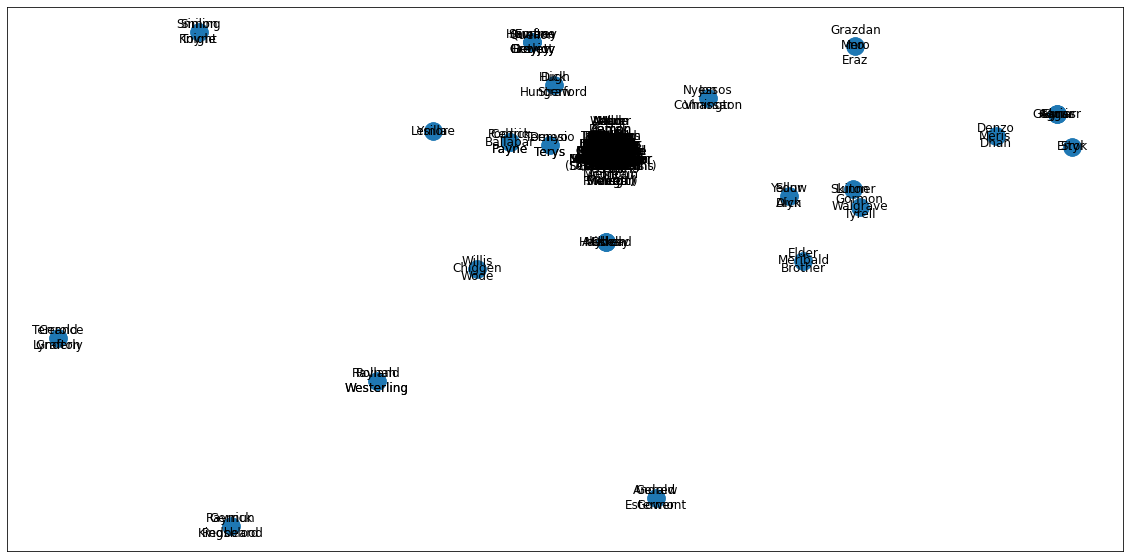

In [28]:
pos = nx.spectral_layout(N)
for node in N.nodes():
     nx.draw_networkx_nodes(N,pos,nodelist=[node])
nx.draw_networkx_labels(N,pos,{n:n.replace('-','\n') for n in N.nodes()})
for e in N.edges(data=True):
    nx.draw_networkx_edges(N,pos,[e])

In [38]:
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(N)
 

In [39]:
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

In [40]:
print(len(node_groups))

23


In [42]:
color_map = []
for node in N:
    if node in node_groups[0]:
        color_map.append('blue')
    elif node in node_groups[1]:
        color_map.append('red')
    elif node in node_groups[2]:
        color_map.append('#999900')
    elif node in node_groups[3]:
        color_map.append('black')
    elif node in node_groups[4]:
        color_map.append('blue')
    elif node in node_groups[5]:
        color_map.append('#ff9933')
    elif node in node_groups[6]:
        color_map.append('#cccc00')
    elif node in node_groups[7]:
        color_map.append('#990033')
    elif node in node_groups[8]:
        color_map.append('#66ffcc')
    elif node in node_groups[9]:
        color_map.append('#669999')
    elif node in node_groups[10]:
        color_map.append('#cc9900')
    elif node in node_groups[11]:
        color_map.append('#ffffcc')
    elif node in node_groups[12]:
        color_map.append('#996633')
    elif node in node_groups[13]:
        color_map.append('#cc3300')
    elif node in node_groups[14]:
        color_map.append('#339966')
    elif node in node_groups[15]:
        color_map.append('#ffff66')
    elif node in node_groups[16]:
        color_map.append('#ff3399')
    elif node in node_groups[17]:
        color_map.append('#9933ff')
    elif node in node_groups[18]:
        color_map.append('#99ff99')
    elif node in node_groups[19]:
        color_map.append('#3366cc')
    elif node in node_groups[20]:
        color_map.append('#666699')
    elif node in node_groups[21]:
        color_map.append('#990000')
    elif node in node_groups[22]:
        color_map.append('#ff99cc')
    
    else:
        color_map.append('green')
        
len(color_map)  

608

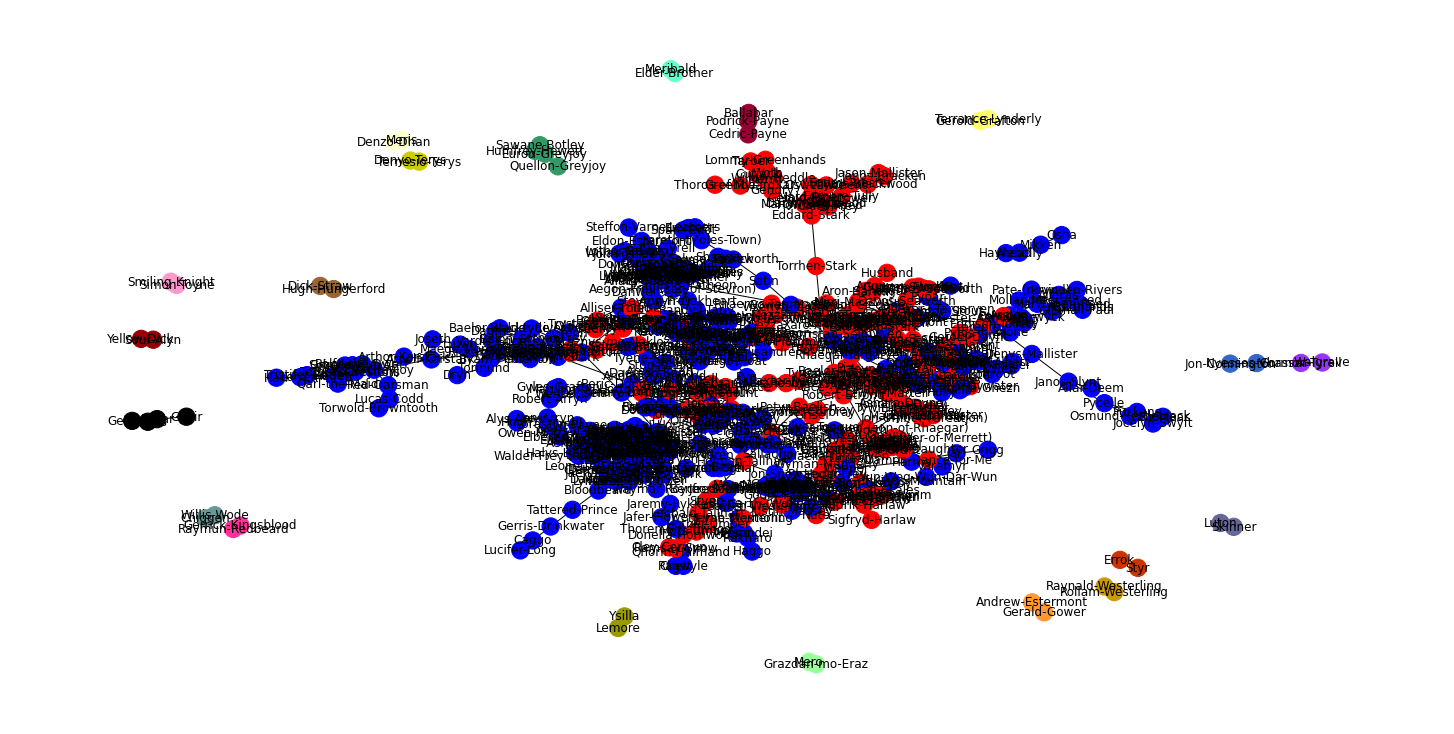

In [43]:
nx.draw(N, node_color=color_map, with_labels=True)
plt.show()

In [35]:
from networkx.algorithms.community import k_clique_communities
communities=list(k_clique_communities(N, 2))

In [36]:
color_map = []
for node in N:
    if node in communities[0]:
        color_map.append('blue')
    elif node in communities[1]:
        color_map.append('red')
    elif node in communities[2]:
        color_map.append('#999900')
    elif node in communities[3]:
        color_map.append('black')
    elif node in communities[4]:
        color_map.append('blue')
    elif node in communities[5]:
        color_map.append('#ff9933')
    elif node in communities[6]:
        color_map.append('#cccc00')
    elif node in communities[7]:
        color_map.append('#990033')
    elif node in communities[8]:
        color_map.append('#66ffcc')
    elif node in communities[9]:
        color_map.append('#669999')
    elif node in communities[10]:
        color_map.append('#cc9900')
    elif node in communities[11]:
        color_map.append('#ffffcc')
    elif node in communities[12]:
        color_map.append('#996633')
    elif node in communities[13]:
        color_map.append('#cc3300')
    elif node in communities[14]:
        color_map.append('#339966')
    elif node in communities[15]:
        color_map.append('#ffff66')
    elif node in communities[16]:
        color_map.append('#ff3399')
    elif node in communities[17]:
        color_map.append('#9933ff')
    elif node in communities[18]:
        color_map.append('#99ff99')
    elif node in communities[19]:
        color_map.append('#3366cc')
    elif node in communities[20]:
        color_map.append('#666699')
    elif node in communities[21]:
        color_map.append('#990000')
    elif node in communities[22]:
        color_map.append('#ff99cc')
    
    else:
        color_map.append('green')
        
len(color_map)      

608

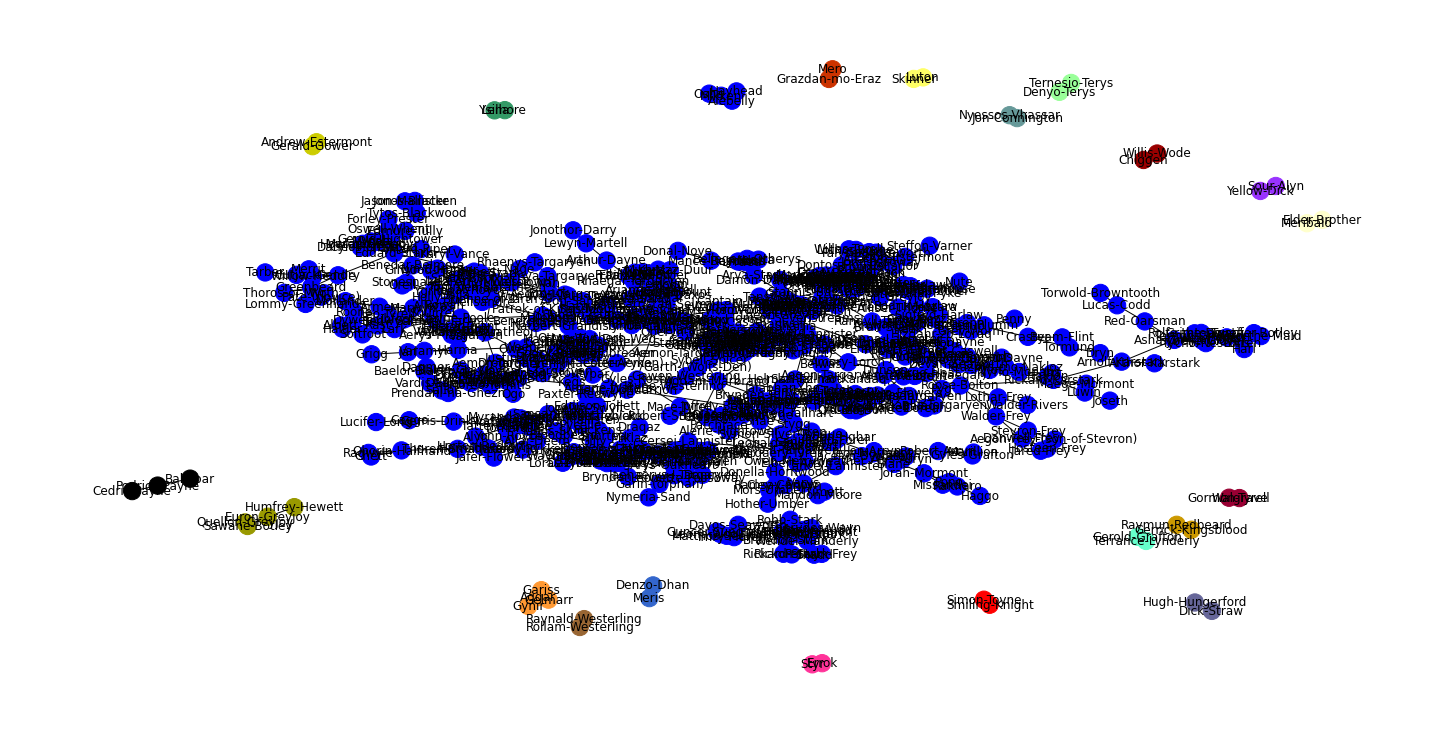

In [37]:
nx.draw(N, node_color=color_map, with_labels=True)
plt.show()